In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from math import floor
from pprint import pprint

In [8]:
file_path=Path("../output_data/fred_data.csv")
new_df = pd.read_csv(file_path)
new_df

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price,Avg. Housing Inventory,Avg. Home Price Index,Avg. GDP (Billions of $),Avg. CPI,Avg. Unemployment Rate,Avg. Household Debt to GDP
0,1963,NaN,NaN,18050.00,NaN,NaN,637.45,31.81,5.64,NaN
1,1964,NaN,NaN,18925.00,NaN,NaN,684.46,32.30,5.16,NaN
2,1965,NaN,NaN,20125.00,NaN,NaN,742.29,32.73,4.51,NaN
3,1966,NaN,NaN,21500.00,NaN,NaN,813.41,33.55,3.79,NaN
4,1967,NaN,NaN,22750.00,NaN,NaN,859.96,34.71,3.84,NaN
...,...,...,...,...,...,...,...,...,...,...
56,2019,3.94,3.39,320250.00,1113750.0,209.45,21521.40,263.21,3.68,76.27
57,2020,3.11,2.60,336950.00,838500.0,222.12,21322.95,267.70,8.09,80.03
58,2021,2.96,2.27,396800.00,727000.0,260.06,23594.03,277.25,5.37,77.97
59,2022,5.34,4.58,457475.00,714250.0,298.52,25744.11,294.30,3.64,76.64


In [9]:
drop_df = new_df.dropna()
drop_df

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price,Avg. Housing Inventory,Avg. Home Price Index,Avg. GDP (Billions of $),Avg. CPI,Avg. Unemployment Rate,Avg. Household Debt to GDP
42,2005,5.87,5.42,236550.00,1467500.0,171.78,13039.20,200.87,5.08,90.68
43,2006,6.41,6.07,243750.00,1853500.0,183.48,13815.58,205.92,4.61,95.35
44,2007,6.34,6.03,244950.00,2135000.0,179.94,14474.23,210.73,4.62,98.15
45,2008,6.03,5.62,229550.00,2229750.0,164.06,14769.86,215.57,5.80,99.06
46,2009,5.04,4.57,215650.00,2036000.0,148.55,14478.07,219.24,9.28,99.27
47,2010,4.69,4.10,222700.00,2000250.0,144.67,15048.97,221.34,9.61,94.12
48,2011,4.45,3.68,224900.00,1902250.0,139.24,15599.73,225.01,8.93,89.93
49,2012,3.66,2.93,244400.00,1555750.0,140.99,16253.97,229.76,8.07,85.69
50,2013,3.98,3.10,266225.00,1538250.0,154.52,16880.68,233.81,7.36,82.90
51,2014,4.17,3.29,285775.00,1452500.0,164.68,17608.14,237.90,6.16,80.86


In [11]:
# Calculate the correlation coefficient between Avg. 30 Year Fixed Mortgage Rate and Avg. Home Price Index
#Drop N/A Values 
analysis1_df = new_df
analysis1_df= analysis1_df[["Year","Avg. 30 Year Fixed Mortgage Rate","Avg. Home Price Index"]]
analysis1_df = analysis1_df.dropna()
correlation_coefficient = analysis1_df['Avg. 30 Year Fixed Mortgage Rate'].corr(analysis1_df["Avg. Home Price Index"])
print(f"Correlation Coefficient: {correlation_coefficient}") 

Correlation Coefficient: -0.7029668139064117


In [13]:
analysis1_df

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. Home Price Index
24,1987,10.21,66.26
25,1988,10.34,71.14
26,1989,10.32,75.51
27,1990,10.13,76.94
28,1991,9.25,75.93
29,1992,8.39,76.33
30,1993,7.31,77.41
31,1994,8.38,79.47
32,1995,7.93,80.99
33,1996,7.81,82.81


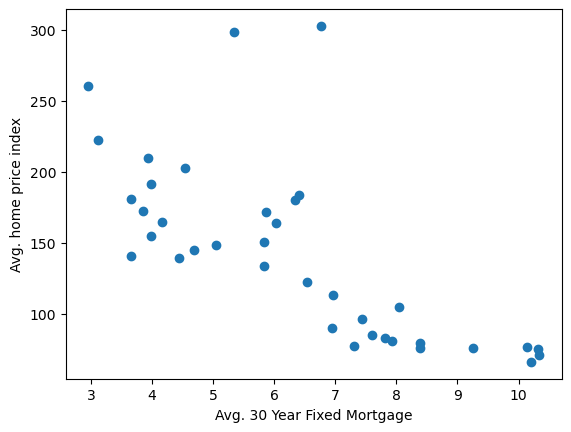

In [12]:
# Plot Avg. 30 Year Fixed Mortgage versus Avg. Home Price Index
plt.scatter(new_df.loc[:,"Avg. 30 Year Fixed Mortgage Rate"],new_df.loc[:,"Avg. Home Price Index"])
plt.xlabel('Avg. 30 Year Fixed Mortgage')
plt.ylabel('Avg. home price index')
plt.show()

In [15]:
# Calculate the correlation coefficient between Avg. 15 Year Fixed Mortgage Rate and Avg. Home Price Index
#Drop N/A Values 
analysis2_df = new_df
analysis2_df= analysis2_df[["Year","Avg. 15 Year Fixed Mortgage Rate","Avg. Home Price Index"]]
analysis2_df = analysis2_df.dropna()
correlation_coefficient = analysis2_df['Avg. 15 Year Fixed Mortgage Rate'].corr(analysis2_df["Avg. Home Price Index"])
print(f"Correlation Coefficient: {correlation_coefficient}") 

Correlation Coefficient: -0.6383970001509593


In [16]:
analysis2_df

,Year,Avg. 15 Year Fixed Mortgage Rate,Avg. Home Price Index
28,1991,8.40,75.93
29,1992,7.94,76.33
30,1993,6.82,77.41
31,1994,7.89,79.47
32,1995,7.48,80.99
33,1996,7.32,82.81
34,1997,7.13,85.32
35,1998,6.59,90.10
36,1999,7.06,96.37
37,2000,7.72,104.78


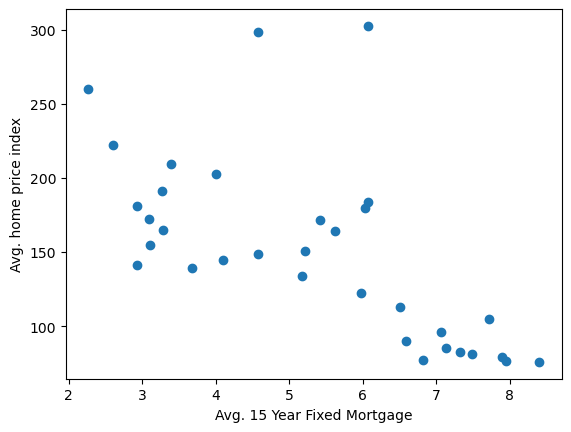

In [17]:
# Plot Avg. 15 Year Fixed Mortgage versus Avg. Home Price Index
plt.scatter(new_df.loc[:,"Avg. 15 Year Fixed Mortgage Rate"],new_df.loc[:,"Avg. Home Price Index"])
plt.xlabel('Avg. 15 Year Fixed Mortgage')
plt.ylabel('Avg. home price index')
plt.show()